# Analisis de la Penetracion de Internet Fijo en bogota para el 2024 y 2025

# Definición

## INTRODUCCION

El objetivo de este proyecto es analizar la penetración de internet fijo en diversas regiones de Colombia utilizando el conjunto de datos de Penetración de Internet Fijo de 2022 a 2023. Los datos incluyen campos como departamentos, municipios, número de accesos a internet fijo, estimaciones de población (DANE) e índices calculados. Nos centraremos en entender las tendencias, las disparidades regionales y las proyecciones futuras, en particular para Bogotá, en los años 2024 y 2025.

## Descripcion del problema

El principal problema es predecir el crecimiento de los accesos a internet fijo en Bogotá para los años 2024 y 2025. El conjunto de datos proporciona datos históricos que nos ayudarán a identificar patrones de crecimiento de la penetración de internet y a predecir cómo podría cambiar en el futuro. El desafío es utilizar las tendencias históricas, posiblemente combinadas con factores externos como el crecimiento de la población y el desarrollo de la infraestructura tecnológica, para hacer predicciones fiables.

[Internet Fijo Penetración Departamentos
](https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Internet-Fijo-Penetraci-n-Departamentos/4py7-br84/about_data)

**Número de suscriptores con acceso fijo a Internet** para cada uno de los departamentos de Colombia según los datos reportados por los proveedores al último día de cada trimestre . Basados en estos datos, y en las proyecciones del DANE para la población por departamento, consolidado 2015-4T al 2019 1T, se muestra el porcentaje de penetración de Internet fijo para cada trimestre.

Última Actualización
17 de septiembre de 2024

Datos suministrados por
Ministerio de Tecnologías de la Información y las Comunicaciones

##  Pasos para el análisis de los datos

**Limpieza de datos:** Verificar que no haya valores nulos o erróneos, especialmente en las columnas de año, trimestre, accesos a internet y población.

**Análisis exploratorio de datos (EDA):** Observar las tendencias a lo largo del tiempo para distintos departamentos y municipios, analizando cómo ha evolucionado el índice de penetración de internet.

**Filtrado de datos:** Extraer específicamente los datos de Bogotá para centrarnos en la predicción para esta ciudad.

**Análisis de tendencias:** Visualizar el crecimiento de los accesos a internet fijo en Bogotá en el período 2022-2023.

**Análisis de correlación:** Evaluar cómo los accesos a internet fijo están relacionados con el tamaño de la población y otros factores relevantes.

## Enfoque para la predicción 2024-2025

 La predicción del crecimiento de los accesos a internet fijo en Bogotá se llevará a cabo utilizando redes neuronales. Las redes neuronales permiten capturar patrones complejos en los datos, lo cual es ideal para identificar tendencias y prever el crecimiento a largo plazo. El enfoque detallado es el siguiente:



*   **Preparación de los datos:** Extraer y transformar los datos históricos de Bogotá, y calcular la tasa de crecimiento anual de los accesos a internet fijo.
*   **Entrenamiento del modelo:** Entrenar una red neuronal utilizando los datos históricos, para que el modelo aprenda a capturar la tendencia en el.
*  **Predicciones:** Utilizar la red neuronal entrenada para proyectar el crecimiento de los accesos a internet fijo en Bogotá para los años 2024 y 2025.






## Técnicas de análisis





*   Redes neuronales: La red neuronal será el modelo principal utilizado para la predicción de accesos a internet fijo, dada su capacidad para manejar relaciones no lineales y patrones complejos en los datos.
*   Análisis de series de tiempo: Si se cuenta con datos de un período más extenso, podríamos complementar la predicción con métodos de series de tiempo, como ARIMA, para contrastar los resultados de la red neuronal.

*  Visualización: Representar gráficamente el crecimiento de los accesos a internet en Bogotá a lo largo del tiempo y proyectar la tendencia para 2024-2025. Comparar visualmente el crecimiento de Bogotá con el de otros municipios clave para observar diferencias regionales.






## Visualizaciones potenciales





*   **Gráfico de series temporales:** Mostrar el crecimiento de los accesos a internet fijo en Bogotá durante 2022-2023, incluyendo las proyecciones para 2024-2025 basadas en el modelo de red neuronal.

*  **Gráfico de barras:** Comparar el número total de accesos a internet fijo en Bogotá con otros municipios clave, destacando las diferencias en la penetración de internet.
*   **Gráfico de tasa de crecimiento:** Visualizar la tasa de crecimiento de los accesos a internet en Bogotá, mostrando el ritmo de cambio a lo largo del tiempo.




## Conclusión

Al finalizar el análisis, se resumirán las tendencias y el escenario futuro basado en las predicciones para 2024-2025, señalando los factores que podrían influir en el crecimiento de los accesos a internet fijo en Bogotá. Además, se discutirá cómo el crecimiento de Bogotá se compara con otras regiones, considerando posibles diferencias en infraestructura y crecimiento poblacional.

# Desarrollo

## Importación de Librerías

Primero, importaremos las librerías necesarias para el análisis y la predicción de los datos. Vamos a utilizar pandas para la manipulación de datos, matplotlib y seaborn para la visualización, y tensorflow para construir y entrenar la red neuronal.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Leemos el conjunto de datos y mostramos sus primeras filas para entender su estructura.

In [47]:
# URL del archivo CSV en formato raw
url = "https://raw.githubusercontent.com/jvergara9208/TalentoTec_Jonathan/main/Proyecto/DataSet/Internet_Fijo_Penetraci_n_Municipio_20241019.csv"

# Cargar el archivo en un DataFrame
df_carga = pd.read_csv(url)
data=df_carga.copy()
# Ver las primeras filas del DataFrame
data.head()


,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2023,2,5,ANTIOQUIA,5353,HISPANIA,495,5790,"8,55"
1,2023,1,17,CALDAS,17001,MANIZALES,102906,454494,"22,64"
2,2023,1,52,NARIÑO,52356,IPIALES,11312,120842,"9,36"
3,2022,4,27,CHOCÓ,27160,CÉRTEGUI,179,5967,"3,00"
4,2022,3,15,BOYACÁ,15740,SIACHOQUE,116,7056,"1,64"


Limpieza De datos

Limpiaremos los datos eliminando valores faltantes y filtrando únicamente la información de Bogotá. Además, convertiremos los datos categóricos a valores numéricos si es necesario.

In [48]:
# Eliminar valores nulos
data = data.dropna()

# Filtrar datos solo para Bogotá
bogota_data = data[data['DEPARTAMENTO'] == 'BOGOTÁ D.C.']

# Confirmar los datos después del filtro
bogota_data.head()


,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
628,2022,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2269823,7873316,"28,83"
906,2021,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2171274,7823334,"27,75"
917,2022,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2261755,7873316,"28,73"
2493,2023,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2251960,7907281,"28,48"
6569,2021,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2157112,7823334,"27,57"


In [49]:
# Número de filas y columnas
filas, columnas = bogota_data.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")


El DataFrame tiene 32 filas y 9 columnas.


In [50]:
# Ordenar el DataFrame por AÑO y TRIMESTRE
bogota_data = bogota_data.sort_values(by=['AÑO', 'TRIMESTRE'], ascending=[True, True])

# Mostrar el DataFrame ordenado
bogota_data.head()

# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar el DataFrame completo
bogota_data


,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
18771,2015,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,2016,1,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,2016,2,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,2016,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,2016,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1728459,7300918,"23,67"
19722,2017,1,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2638171,7337449,"35,95"
31959,2017,2,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1776768,7337449,"24,22"
32574,2017,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1807827,7337449,"24,64"
17650,2017,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1818094,7337449,"24,78"
30078,2018,1,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1826350,7412566,"24,64"


uniremos las columnas de trimestre y año

para combinar las columnas AÑO y TRIMESTRE en una sola columna, vamos a usar el método .astype(str) para convertir ambos valores en texto y luego concatenarlos. Esto te permitirá crear una columna con un formato como AÑO-TRIMESTRE (por ejemplo, 2022-4).

In [51]:
# Crear una nueva columna combinando AÑO y TRIMESTRE como número
bogota_data['AÑO_TRIMESTRE'] = bogota_data['AÑO'].astype(str) + bogota_data['TRIMESTRE'].apply(lambda x: f"{x:02d}")

# Opcional: eliminar las columnas originales
bogota_data = bogota_data.drop(columns=['AÑO', 'TRIMESTRE'])

# Convertir la columna AÑO_TRIMESTRE a entero
bogota_data['AÑO_TRIMESTRE'] = bogota_data['AÑO_TRIMESTRE'].astype(int)

# Reordenar las columnas para que AÑO_TRIMESTRE esté al principio
cols = ['AÑO_TRIMESTRE'] + [col for col in bogota_data.columns if col != 'AÑO_TRIMESTRE']
bogota_data = bogota_data[cols]

# Ver el DataFrame actualizado
bogota_data.head()

,AÑO_TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
18771,201504,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,201601,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,201602,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,201603,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,201604,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1728459,7300918,"23,67"


In [52]:
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar el DataFrame completo
bogota_data


,AÑO_TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
18771,201504,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,201601,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,201602,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,201603,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,201604,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1728459,7300918,"23,67"
19722,201701,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2638171,7337449,"35,95"
31959,201702,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1776768,7337449,"24,22"
32574,201703,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1807827,7337449,"24,64"
17650,201704,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1818094,7337449,"24,78"
30078,201801,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1826350,7412566,"24,64"


 eliminaremos las columnas COD_DEPARTAMENTO y COD_MUNICIPIO, usaremos elel método .drop() en pandas, especificando los nombres de las columnas, ya que estas no nos proporciona una informacion relevante.

In [53]:
# Eliminar las columnas COD_DEPARTAMENTO y COD_MUNICIPIO
bogota_data = bogota_data.drop(columns=['COD_DEPARTAMENTO', 'COD_MUNICIPIO'])

# Ver el DataFrame actualizado
bogota_data.head()


,AÑO_TRIMESTRE,DEPARTAMENTO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
18771,201504,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,201601,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,201602,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,201603,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,201604,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1728459,7300918,"23,67"


renombramos la columna indice por  INDICE a INDICE(%)



In [54]:
# Renombrar la columna INDICE a INDICE(%)
bogota_data = bogota_data.rename(columns={'INDICE': 'INDICE(%)'})

# Ver el DataFrame actualizado
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar el DataFrame completo
bogota_data


,AÑO_TRIMESTRE,DEPARTAMENTO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE(%)
18771,201504,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,201601,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,201602,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,201603,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,201604,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1728459,7300918,"23,67"
19722,201701,BOGOTÁ D.C.,"BOGOTÁ, D.C.",2638171,7337449,"35,95"
31959,201702,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1776768,7337449,"24,22"
32574,201703,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1807827,7337449,"24,64"
17650,201704,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1818094,7337449,"24,78"
30078,201801,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1826350,7412566,"24,64"


In [55]:
# Guardar el DataFrame actualizado en un archivo CSV
bogota_data.to_csv('bogota_data_actualizado.csv', index=False)

# Descargar el archivo CSV generado
from google.colab import files
files.download('bogota_data_actualizado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

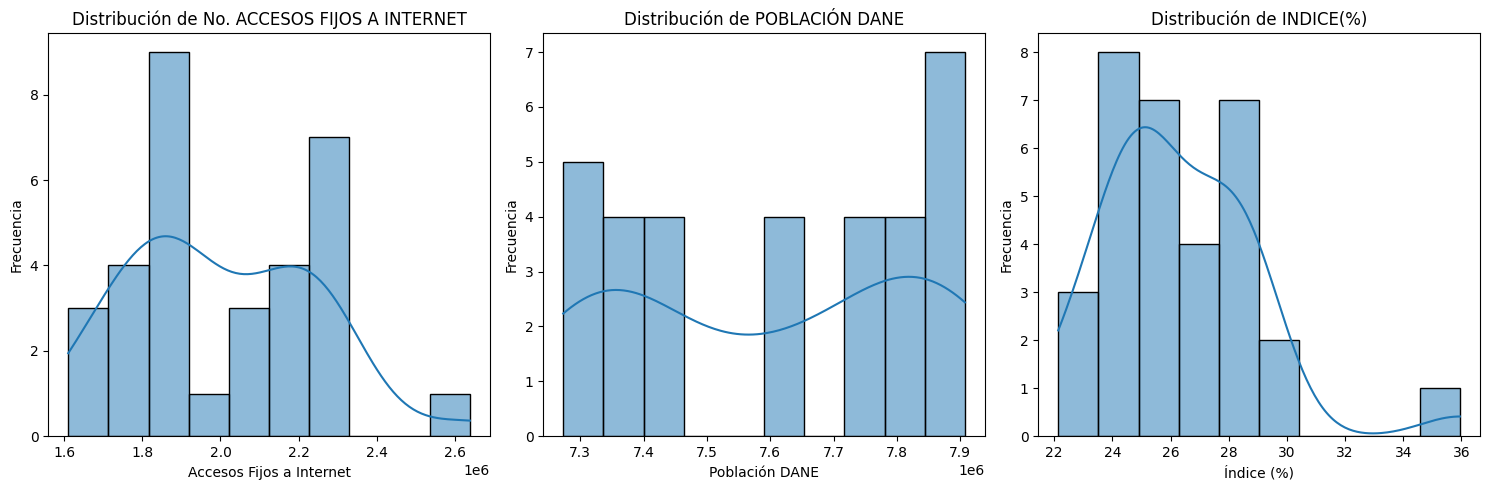

In [56]:

# Convertir "INDICE(%)" a formato numérico, reemplazando la coma por un punto decimal
bogota_data['INDICE(%)'] = bogota_data['INDICE(%)'].str.replace(',', '.').astype(float)

# Crear histogramas para las columnas numéricas
plt.figure(figsize=(15, 5))

# Histograma para "No. ACCESOS FIJOS A INTERNET"
plt.subplot(1, 3, 1)
sns.histplot(bogota_data['No. ACCESOS FIJOS A INTERNET'], bins=10, kde=True)
plt.title('Distribución de No. ACCESOS FIJOS A INTERNET')
plt.xlabel('Accesos Fijos a Internet')
plt.ylabel('Frecuencia')

# Histograma para "POBLACIÓN DANE"
plt.subplot(1, 3, 2)
sns.histplot(bogota_data['POBLACIÓN DANE'], bins=10, kde=True)
plt.title('Distribución de POBLACIÓN DANE')
plt.xlabel('Población DANE')
plt.ylabel('Frecuencia')

# Histograma para "INDICE(%)"
plt.subplot(1, 3, 3)
sns.histplot(bogota_data['INDICE(%)'], bins=10, kde=True)
plt.title('Distribución de INDICE(%)')
plt.xlabel('Índice (%)')
plt.ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


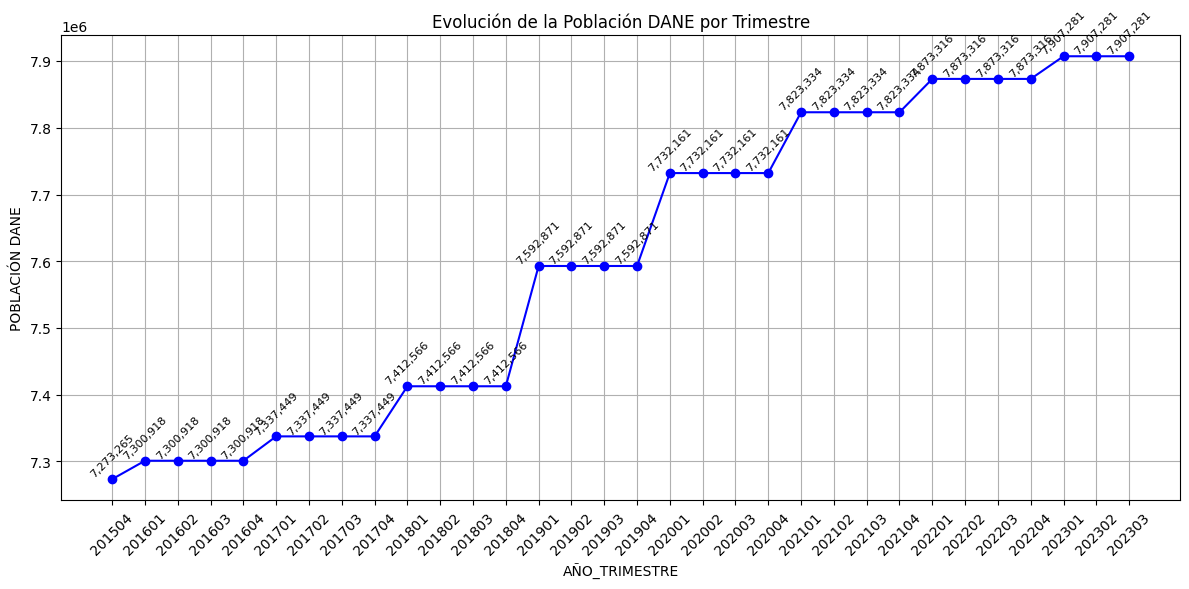

In [57]:
#bogota_data = pd.read_csv('bogota_data_actualizado.csv')

# Convertir AÑO_TRIMESTRE a string para ordenarlo correctamente en el gráfico
bogota_data['AÑO_TRIMESTRE'] = bogota_data['AÑO_TRIMESTRE'].astype(str)

# Ordenar por AÑO_TRIMESTRE para asegurar la secuencia temporal correcta
bogota_data = bogota_data.sort_values(by='AÑO_TRIMESTRE')

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(bogota_data['AÑO_TRIMESTRE'], bogota_data['POBLACIÓN DANE'], marker='o', linestyle='-', color='b')
plt.title('Evolución de la Población DANE por Trimestre')
plt.xlabel('AÑO_TRIMESTRE')
plt.ylabel('POBLACIÓN DANE')

# Etiquetas para cada punto del gráfico con el valor completo
for i, (x, y) in enumerate(zip(bogota_data['AÑO_TRIMESTRE'], bogota_data['POBLACIÓN DANE'])):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=8, rotation=45)

# Personalizar el eje x solo con los trimestres presentes en los datos
plt.xticks(ticks=range(len(bogota_data)), labels=bogota_data['AÑO_TRIMESTRE'], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


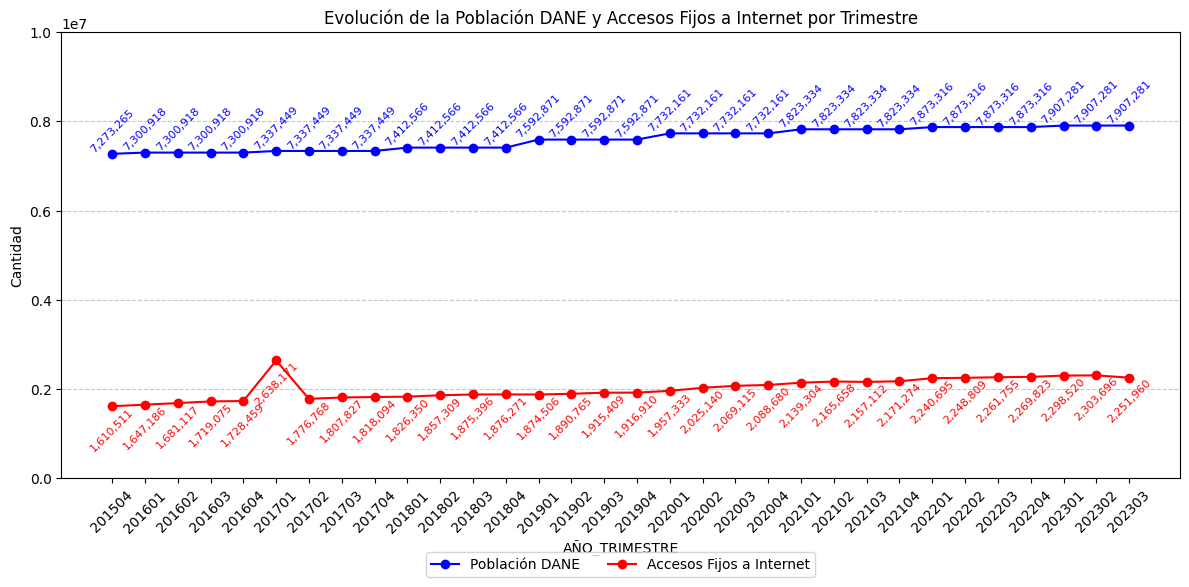

In [58]:

#bogota_data = pd.read_csv('bogota_data_actualizado.csv')

# Convertir AÑO_TRIMESTRE a string para ordenar correctamente en el gráfico
bogota_data['AÑO_TRIMESTRE'] = bogota_data['AÑO_TRIMESTRE'].astype(str)

# Ordenar por AÑO_TRIMESTRE para asegurar la secuencia temporal correcta
bogota_data = bogota_data.sort_values(by='AÑO_TRIMESTRE')

# Configurar la figura
plt.figure(figsize=(12, 6))

# Graficar la Población DANE en azul
plt.plot(bogota_data['AÑO_TRIMESTRE'], bogota_data['POBLACIÓN DANE'], marker='o', linestyle='-', color='b', label='Población DANE')

# Graficar los Accesos Fijos a Internet en rojo
plt.plot(bogota_data['AÑO_TRIMESTRE'], bogota_data['No. ACCESOS FIJOS A INTERNET'], marker='o', linestyle='-', color='r', label='Accesos Fijos a Internet')

# Añadir título y etiquetas
plt.title('Evolución de la Población DANE y Accesos Fijos a Internet por Trimestre')
plt.xlabel('AÑO_TRIMESTRE')
plt.ylabel('Cantidad')

# Etiquetas para cada punto de la Población DANE
for x, y in zip(bogota_data['AÑO_TRIMESTRE'], bogota_data['POBLACIÓN DANE']):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=8, rotation=45, color='blue')

# Etiquetas para cada punto de Accesos Fijos a Internet
for x, y in zip(bogota_data['AÑO_TRIMESTRE'], bogota_data['No. ACCESOS FIJOS A INTERNET']):
    plt.text(x, y, f'{int(y):,}', ha='center', va='top', fontsize=8, rotation=45, color='red')

# Mostrar la leyenda debajo del gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Configurar límites y cuadrícula
plt.ylim(0, 10000000)  # Limitar el eje Y hasta 10 millones
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Cuadrícula solo en el eje Y

# Personalizar el eje x solo con los trimestres presentes en los datos
plt.xticks(ticks=range(len(bogota_data)), labels=bogota_data['AÑO_TRIMESTRE'], rotation=45)

# Activar cuadrícula
plt.tight_layout()
plt.show()

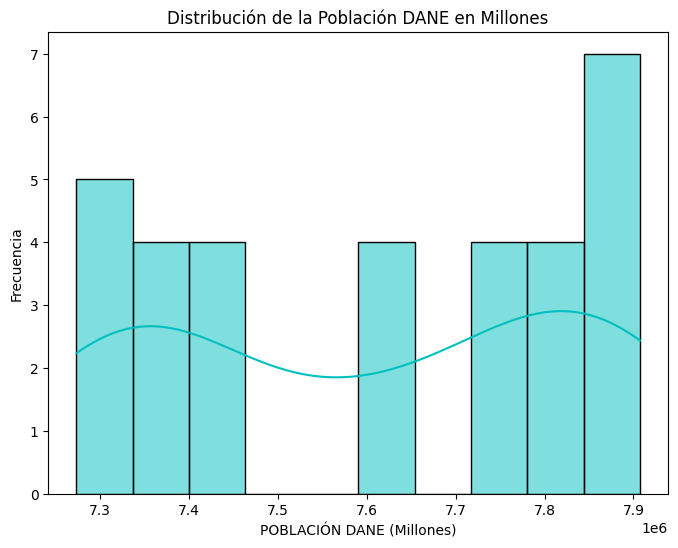

In [59]:
import seaborn as sns

# Histograma para "POBLACIÓN DANE" en millones
plt.figure(figsize=(8, 6))
sns.histplot(bogota_data['POBLACIÓN DANE'], bins=10, kde=True, color='c')
plt.title('Distribución de la Población DANE en Millones')
plt.xlabel('POBLACIÓN DANE (Millones)')
plt.ylabel('Frecuencia')
plt.show()


Ahora se comprobara cuantos datos y de que periodos faltan

In [60]:
# A continuación, se define la función para encontrar trimestres faltantes

def encontrar_trimestres_faltantes(data, anio_inicial, anio_final):
    faltantes = []
    # Convertir la columna a string
    data['AÑO_TRIMESTRE'] = data['AÑO_TRIMESTRE'].astype(str)

    # Iterar sobre cada año en el rango
    for anio in range(anio_inicial, anio_final + 1):
        # Crear un conjunto con los trimestres esperados para el año actual
        trimestres_esperados = {f"{anio}0{t}" for t in range(1, 5)}
        # Filtrar los trimestres presentes en el DataFrame para el año actual
        trimestres_presentes = set(data[data['AÑO_TRIMESTRE'].str.startswith(str(anio))]['AÑO_TRIMESTRE'])
        # Calcular los trimestres faltantes comparando con los esperados
        trimestres_faltantes = trimestres_esperados - trimestres_presentes
        # Agregar los trimestres faltantes a la lista
        faltantes.extend(sorted(trimestres_faltantes))

    return faltantes

# Usar la función con los años inicial y final
anio_inicial = 2015
anio_final = 2025
trimestres_faltantes = encontrar_trimestres_faltantes(bogota_data, anio_inicial, anio_final)

# Mostrar los trimestres faltantes
print(trimestres_faltantes)

['201501', '201502', '201503', '202304', '202401', '202402', '202403', '202404', '202501', '202502', '202503', '202504']


Para calcular el índice de penetración de internet, podemos partir de la fórmula común para este tipo de análisis, que relaciona el número de accesos a internet con la población. El índice suele calcularse como:
$$
\text{ÍNDICE} = \left( \frac{\text{No. de Accesos Fijos a Internet}}{\text{Población DANE}} \right) \times 100
$$
Si tu dataset incluye los campos **No. de Accesos Fijos a Internet** y **Población DANE**, puedes aplicar esta fórmula a cada fila para comparar el índice calculado con el índice que está en el archivo.

En resumen, la comparación del índice calculado con el índice existente nos permitirá:

*   Validar la precisión de los datos.
*   los estándares utilizados.
*   Mejorar la fiabilidad de las predicciones.
*   Detectar posibles errores o inconsistencias que deban corregirse.




### Paso para el cálculo y comparación del índice
Primero, carga el archivo actualizado, calcula el índice y verifica si coincide con el índice que está en la columna existente.


In [61]:
# Crear una copia del DataFrame bogota_data
bogota_data_comparar = bogota_data.copy()
bogota_data_comparar.head()


,AÑO_TRIMESTRE,DEPARTAMENTO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE(%)
18771,201504,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1610511,7273265,22.14
30907,201601,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1647186,7300918,22.56
18047,201602,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1681117,7300918,23.03
24086,201603,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1719075,7300918,23.55
19515,201604,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1728459,7300918,23.67


In [62]:
# Calcular el índice de penetración en la copia
bogota_data_comparar['ÍNDICE Calculado'] = (bogota_data_comparar['No. ACCESOS FIJOS A INTERNET'] / bogota_data_comparar['POBLACIÓN DANE']) * 100

# Determinar si el índice calculado coincide con el índice existente
bogota_data_comparar['Coincide'] = bogota_data_comparar['ÍNDICE Calculado'].round(2) == bogota_data_comparar['INDICE(%)'].round(2)

# Imprimir el DataFrame comparativo con columnas relevantes
bogota_data_comparar[['AÑO_TRIMESTRE', 'No. ACCESOS FIJOS A INTERNET', 'POBLACIÓN DANE', 'INDICE(%)', 'ÍNDICE Calculado', 'Coincide']]


,AÑO_TRIMESTRE,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE(%),ÍNDICE Calculado,Coincide
18771,201504,1610511,7273265,22.14,22.142889,True
30907,201601,1647186,7300918,22.56,22.561355,True
18047,201602,1681117,7300918,23.03,23.026104,True
24086,201603,1719075,7300918,23.55,23.546012,True
19515,201604,1728459,7300918,23.67,23.674543,True
19722,201701,2638171,7337449,35.95,35.954880,True
31959,201702,1776768,7337449,24.22,24.215064,True
32574,201703,1807827,7337449,24.64,24.638359,True
17650,201704,1818094,7337449,24.78,24.778285,True
30078,201801,1826350,7412566,24.64,24.638566,True


# Explicación: Viabilidad de la Regresión Lineal para la Predicción de Accesos a Internet Fijo

En este proyecto, queremos predecir los accesos a internet fijo en Bogotá para varios trimestres faltantes, incluyendo proyecciones para los años 2024 y 2025. A continuación se analiza si el uso de una regresión lineal es viable para esta predicción.

## 1. Comportamiento Lineal de los Datos

La regresión lineal es un modelo que asume una relación lineal entre las variables independientes (en este caso, año_trimestre) y la variable dependiente (número de accesos a internet fijo). Este tipo de modelo puede ser adecuado si el crecimiento de los accesos a internet muestra una tendencia constante a lo largo del tiempo, sin grandes variaciones o cambios acelerados.

## 2. Dinámica de Crecimiento en el Tiempo

Observando los datos recientes de accesos a internet fijo en Bogotá, es importante analizar si el crecimiento en estos últimos trimestres sigue un patrón lineal o si muestra aceleraciones o desaceleraciones. Si el crecimiento de los accesos ha sido constante, una regresión lineal podría capturar bien la tendencia. Sin embargo, en muchos casos relacionados con tecnología y acceso a servicios, el crecimiento puede no ser lineal, mostrando una tendencia exponencial o cambios bruscos en la expansión de infraestructura.

## 3. Predictibilidad a Largo Plazo

Para predecir varios trimestres en el futuro, hasta 2025, la regresión lineal podría ser viable para obtener una primera aproximación, pero no siempre es la más precisa en el largo plazo. Esto se debe a que la regresión lineal puede subestimar o sobreestimar el crecimiento si el ritmo cambia. En estos casos, los modelos de series de tiempo o incluso redes neuronales pueden capturar mejor patrones complejos y cambios en la tendencia.

## Conclusión: Uso de la Regresión Lineal en el Proyecto

Dado que tenemos datos de accesos hasta 2023, una regresión lineal inicial puede ser útil como primera aproximación. Sin embargo, es importante evaluar su precisión y considerar alternativas si los datos muestran variaciones importantes.

## Próximos Pasos para Evaluar la Precisión de la Regresión Lineal

Para determinar si la regresión lineal es suficiente para nuestras predicciones, realizaremos los siguientes pasos:

1. **Implementar una Regresión Lineal Inicial**: Aplicaremos la regresión lineal en los datos históricos para obtener una predicción de los trimestres faltantes.
2. **Calcular las Métricas de Precisión**: Usaremos métricas de precisión como el Error Cuadrático Medio (MSE), el Error Absoluto Medio (MAE) y el R² (coeficiente de determinación) para evaluar la exactitud del modelo lineal. Estas métricas nos permitirán cuantificar la diferencia entre las predicciones y los valores reales.
3. **Comparar con Alternativas**: En caso de que el error de la regresión lineal sea significativo, podemos comparar este modelo con otros enfoques, como modelos de series temporales (ARIMA) o redes neuronales. Esto nos permitirá seleccionar el modelo que mejor se adapte a la dinámica de crecimiento en Bogotá.
4. **Evaluar el Modelo a Corto y Largo Plazo**: Es posible que el modelo de regresión lineal sea suficientemente preciso para el corto plazo (2023-2024) pero no para predicciones más avanzadas. Evaluaremos la precisión en distintos períodos y ajustaremos el modelo si es necesario.

A continuación, implementaremos estos pasos para verificar si la regresión lineal es adecuada para el proyecto.


## **Interpretación de los Resultados**

- **Error Cuadrático Medio (MSE) y Error Absoluto Medio (MAE)**: Valores bajos de estas métricas indican que el modelo lineal se ajusta bien a los datos históricos.
- **Coeficiente de Determinación (R²)**: Un valor de R² cercano a 1 indica que la regresión lineal explica bien la variabilidad en los accesos a internet.

Si las métricas muestran que el error es aceptable, la regresión lineal puede ser suficiente para las predicciones. Si el error es alto, podríamos probar modelos de series de tiempo o redes neuronales para mejorar la precisión.


In [25]:
# hacemos esto para enteneder que debemos trasformar para nuestra regresion Lineal
bogota_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 18771 to 2493
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AÑO_TRIMESTRE                 32 non-null     object 
 1   DEPARTAMENTO                  32 non-null     object 
 2   MUNICIPIO                     32 non-null     object 
 3   No. ACCESOS FIJOS A INTERNET  32 non-null     int64  
 4   POBLACIÓN DANE                32 non-null     int64  
 5   INDICE(%)                     32 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [28]:
# cargamos la libreria para el analisis

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


MSE: 24587739726.14
MAE: 70659.83
R²: 0.56


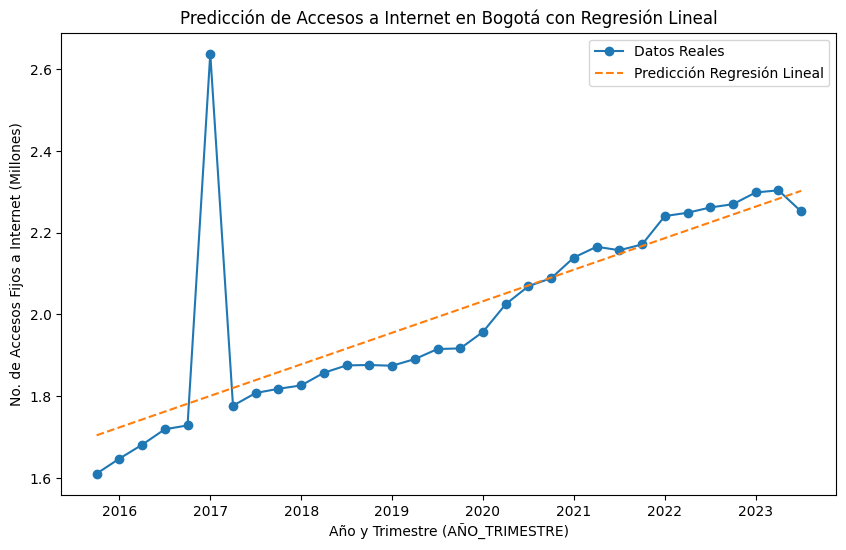

In [63]:

# Crear una copia del DataFrame original con un nombre específico
linear_penetracion_internet = bogota_data.copy()

# Crear la columna 'AÑO_TRIMESTRE_num' convirtiendo 'AÑO_TRIMESTRE' en una variable numérica
linear_penetracion_internet['AÑO_TRIMESTRE_num'] = linear_penetracion_internet['AÑO_TRIMESTRE'].str[:4].astype(int) + (linear_penetracion_internet['AÑO_TRIMESTRE'].str[4:].astype(int) - 1) / 4

# Definir las variables X (AÑO_TRIMESTRE_num) e y (No. de Accesos Fijos a Internet)
X = linear_penetracion_internet[['AÑO_TRIMESTRE_num']]
y = linear_penetracion_internet['No. ACCESOS FIJOS A INTERNET']

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predicción con el modelo lineal
y_pred = model.predict(X)

# Calcular métricas de precisión
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Mostrar métricas
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

# Graficar datos históricos y predicciones
plt.figure(figsize=(10, 6))
plt.plot(linear_penetracion_internet['AÑO_TRIMESTRE_num'], y / 1e6, label='Datos Reales', marker='o')
plt.plot(linear_penetracion_internet['AÑO_TRIMESTRE_num'], y_pred / 1e6, label='Predicción Regresión Lineal', linestyle='--')
plt.xlabel('Año y Trimestre (AÑO_TRIMESTRE)')
plt.ylabel('No. de Accesos Fijos a Internet (Millones)')
plt.title('Predicción de Accesos a Internet en Bogotá con Regresión Lineal')
plt.legend()
plt.show()

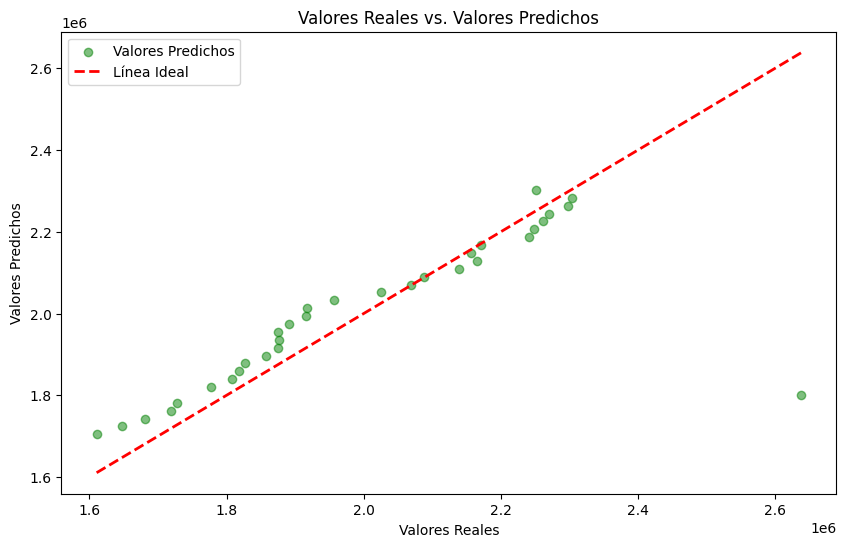

In [65]:
import matplotlib.pyplot as plt


# Gráfico de dispersión de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, color='green', label='Valores Predichos')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Línea Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.legend()
plt.show()


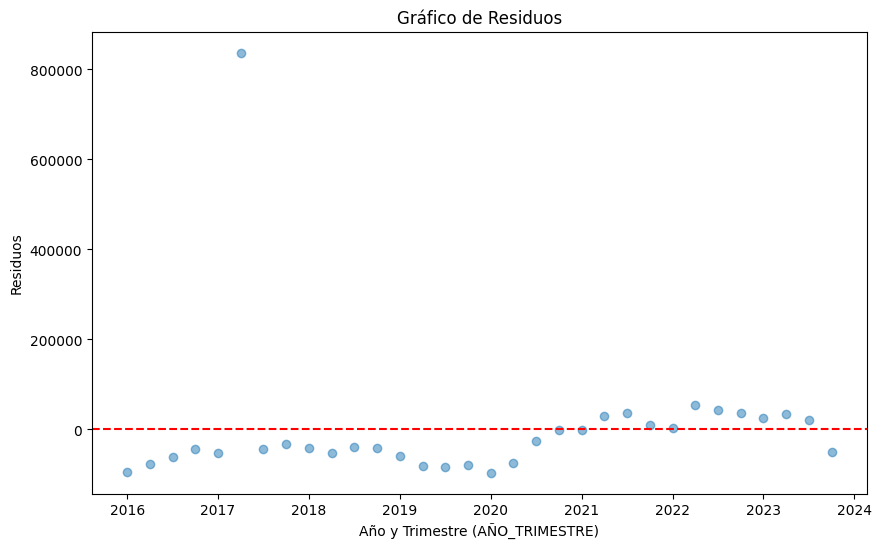

In [35]:
# Calcular los residuos
residuos = y - y_pred

# Gráfico de los residuos
plt.figure(figsize=(10, 6))
plt.scatter(bogota_data['AÑO_TRIMESTRE_num'], residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Año y Trimestre (AÑO_TRIMESTRE)')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()


## Interpretación de los Resultados

1. **Error Cuadrático Medio (MSE: 24,587,739,726.14)**:
   - El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales. Un valor alto de MSE indica que hay una gran diferencia entre las predicciones del modelo y los valores reales. En este caso, el MSE es bastante alto, lo que sugiere que el modelo de regresión lineal no está capturando bien la variabilidad en los datos.

2. **Error Absoluto Medio (MAE: 70,659.83)**:
   - El MAE mide el promedio de los errores absolutos entre las predicciones y los valores reales. Un MAE de 70,659.83 significa que, en promedio, las predicciones del modelo están desviadas por aproximadamente 70,660 accesos fijos a internet. Este valor también es relativamente alto, indicando que las predicciones no son muy precisas.

3. **Coeficiente de Determinación (R²: 0.56)**:
   - El R² indica la proporción de la variabilidad en la variable dependiente que es explicada por el modelo. Un valor de R² de 0.56 significa que el modelo de regresión lineal explica el 56% de la variabilidad en los accesos fijos a internet. Aunque esto muestra que el modelo tiene cierta capacidad explicativa, un R² de 0.56 no es muy alto, lo que sugiere que hay un 44% de la variabilidad que no está siendo explicada por el modelo.

### Gráfico de Dispersión de Valores Reales vs. Predichos
- El gráfico de dispersión muestra los valores reales frente a los valores predichos. La mayoría de los puntos están alineados a lo largo de la diagonal, lo que indica una buena correspondencia entre los valores reales y los predichos. Sin embargo, hay algunas desviaciones significativas que contribuyen a los altos valores de MSE y MAE.

### Gráfico de Residuos
- El gráfico de residuos muestra los errores de predicción a lo largo del tiempo. Los residuos parecen estar distribuidos aleatoriamente alrededor del eje horizontal, lo que sugiere que no hay patrones evidentes de error sistemático. Sin embargo, la magnitud de los residuos indica que las predicciones no son muy precisas.

### Conclusión:
- **Precisión del Modelo**: Los valores altos de MSE y MAE, junto con un R² moderado, indican que el modelo de regresión lineal no está proporcionando predicciones muy precisas para los accesos fijos a internet en Bogotá.
- **Recomendación**: Dado que la regresión lineal no parece ser suficiente para capturar la dinámica de los datos, sería recomendable explorar otros modelos más complejos, como modelos de series temporales (por ejemplo, ARIMA) o redes neuronales, que podrían capturar mejor las tendencias y variaciones en los datos.

Nota: guardaremos los datos para poder comparar con futuros modelos y p´redicciones

In [36]:
# Crear un DataFrame con las métricas y las predicciones
resultados = pd.DataFrame({
    'AÑO_TRIMESTRE': bogota_data['AÑO_TRIMESTRE'],
    'Valores_Reales': y,
    'Valores_Predichos': y_pred,
    'MSE': [mse] * len(y),
    'MAE': [mae] * len(y),
    'R2': [r2] * len(y)
})

# Guardar el DataFrame en un archivo CSV
resultados.to_csv('resultados_regresion_lineal.csv', index=False)

print("Resultados guardados en 'resultados_regresion_lineal.csv'")

Resultados guardados en 'resultados_regresion_lineal.csv'


### **Explicación del Uso de ARIMA**
El modelo ARIMA (AutoRegressive Integrated Moving Average) es una técnica de series temporales que se utiliza para predecir valores futuros basándose en datos históricos. Es especialmente útil cuando los datos muestran patrones temporales, como tendencias o estacionalidades, que no pueden ser capturados adecuadamente por modelos más simples como la regresión lineal.
### **¿Por Qué Usar ARIMA?**
1. **Captura de Patrones Temporales**: A diferencia de la regresión lineal, que asume una relación lineal entre las variables, ARIMA puede capturar patrones más complejos en los datos, como tendencias no lineales y estacionalidades.
1. **Mejor Precisión en Predicciones**: ARIMA puede proporcionar predicciones más precisas cuando los datos históricos muestran variaciones que no son lineales. Esto es crucial para datos relacionados con tecnología y acceso a servicios, donde el crecimiento puede no ser constante.
1. **Evaluación Comparativa**: Al comparar los resultados de ARIMA con los de la regresión lineal, podemos determinar cuál modelo se ajusta mejor a los datos y proporciona predicciones más precisas.
### **Pasos a Seguir**
1. **Implementación del Modelo ARIMA**: Aplicaremos el modelo ARIMA a los datos históricos de accesos fijos a internet en Bogotá.
1. **Predicción con ARIMA**: Utilizaremos el modelo entrenado para predecir los valores futuros de accesos fijos a internet.
1. **Cálculo de Métricas de Precisión**: Calcularemos las mismas métricas de precisión (MSE, MAE y R²) para evaluar el rendimiento del modelo ARIMA.
1. **Comparación de Resultados**: Compararemos las métricas obtenidas con ARIMA con las de la regresión lineal para determinar cuál modelo es más adecuado para nuestras predicciones.
1. **Visualización de Resultados**: Graficaremos los valores reales y predichos para visualizar el rendimiento del modelo ARIMA.
### **Determinación**
Al final de este proceso, podremos determinar si el modelo ARIMA proporciona predicciones más precisas y confiables que la regresión lineal. Esto nos permitirá seleccionar el modelo más adecuado para predecir los accesos fijos a internet en Bogotá y mejorar la precisión de nuestras proyecciones futuras.

### **Interpretación de los Resultados ARIMA**
1. **Error Cuadrático Medio (MSE)**:
   1. Un MSE bajo indica que el modelo ARIMA se ajusta bien a los datos históricos. Compararemos este valor con el MSE de la regresión lineal para evaluar cuál modelo es más preciso.
1. **Error Absoluto Medio (MAE)**:
   1. Un MAE bajo significa que, en promedio, las predicciones del modelo ARIMA están más cerca de los valores reales. Este valor también se comparará con el MAE de la regresión lineal.
1. **Coeficiente de Determinación (R²)**:
   1. Un R² cercano a 1 indica que el modelo ARIMA explica bien la variabilidad en los accesos a internet. Compararemos este valor con el R² de la regresión lineal para determinar cuál modelo tiene mejor capacidad explicativa.
### **Conclusión:**
- **Comparación de Modelos**: Al comparar las métricas de precisión de ambos modelos (regresión lineal y ARIMA), podremos determinar cuál modelo proporciona predicciones más precisas y cuál es más adecuado para predecir los accesos fijos a internet en Bogotá.

### **Fórmula para ARIMA**
El modelo ARIMA se define por tres parámetros: ( p ), ( d ), y ( q ):

- ( p ): Número de términos autorregresivos (AR).
- ( d ): Número de diferencias no estacionales necesarias para hacer la serie temporal estacionaria.
- ( q ): Número de términos de media móvil (MA).

La fórmula general para un modelo ARIMA(( p, d, q )) es:

Yt​=c+ϕ1​Yt−1​+ϕ2​Yt−2​+…+ϕp​Yt−p​+θ1​ϵt−1​+θ2​ϵt−2​+…+θq​ϵt−q​+ϵt​

Donde:

- ( Y\_t ) es el valor de la serie en el tiempo ( t ).
- ( c ) es una constante.
- ( \phi ) son los coeficientes de los términos autorregresivos.
- ( \theta ) son los coeficientes de los términos de media móvil.
- ( \epsilon\_t ) es el error en el tiempo ( t ).



In [39]:
#instalamos la libreria
!pip install statsmodels


In [40]:
# importamos las librerias y limpiamos variables usadas anteriormente
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


MSE: 126955472142.66
MAE: 138639.29
R²: -1.25


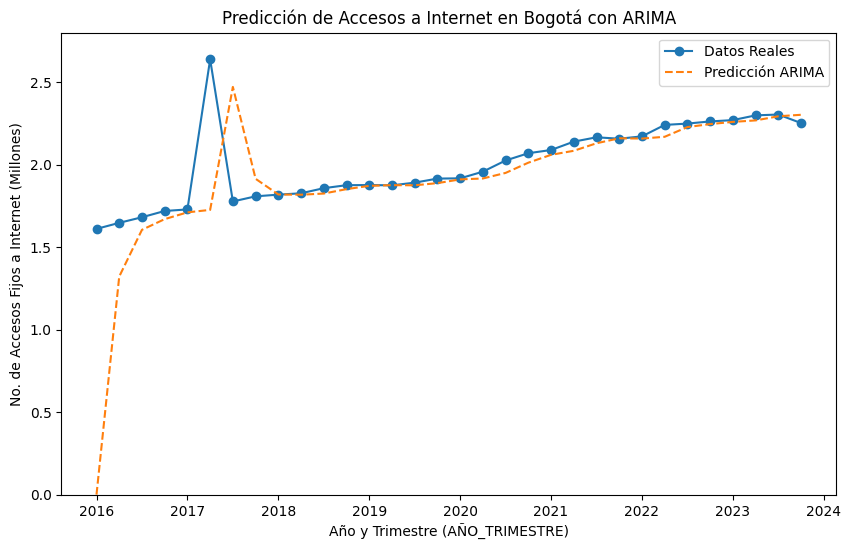

In [41]:

# Crear la columna 'AÑO_TRIMESTRE_num' convirtiendo 'AÑO_TRIMESTRE' en una variable numérica
bogota_data['AÑO_TRIMESTRE_num'] = bogota_data['AÑO_TRIMESTRE'].str[:4].astype(int) + bogota_data['AÑO_TRIMESTRE'].str[4:].astype(int) / 4

# Definir la variable y (No. de Accesos Fijos a Internet)
y = bogota_data['No. ACCESOS FIJOS A INTERNET']

# Crear y entrenar el modelo ARIMA
model = ARIMA(y, order=(1, 1, 1))
model_fit = model.fit()

# Predicción con el modelo ARIMA
y_pred = model_fit.predict(start=0, end=len(y)-1, typ='levels')

# Calcular métricas de precisión
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Mostrar métricas
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

# Graficar datos históricos y predicciones
plt.figure(figsize=(10, 6))
plt.plot(bogota_data['AÑO_TRIMESTRE_num'], y / 1e6, label='Datos Reales', marker='o')
plt.plot(bogota_data['AÑO_TRIMESTRE_num'], y_pred / 1e6, label='Predicción ARIMA', linestyle='--')
plt.ylim(0, 2.8)  # Extender el eje y hasta 2.8 millones
plt.xlabel('Año y Trimestre (AÑO_TRIMESTRE)')
plt.ylabel('No. de Accesos Fijos a Internet (Millones)')
plt.title('Predicción de Accesos a Internet en Bogotá con ARIMA')
plt.legend()
plt.show()


### Interpretación de los Resultados del Modelo ARIMA
1. **Error Cuadrático Medio (MSE: 126,955,472,142.66)**:
   1. El MSE es muy alto, lo que indica que las predicciones del modelo ARIMA tienen una gran diferencia con los valores reales. Esto sugiere que el modelo no está capturando bien la variabilidad en los datos.
1. **Error Absoluto Medio (MAE: 138,639.29)**:
   1. El MAE también es alto, lo que significa que, en promedio, las predicciones del modelo ARIMA están desviadas por aproximadamente 138,639 accesos fijos a internet. Esto indica una baja precisión en las predicciones.
1. **Coeficiente de Determinación (R²: -1.25)**:
   1. Un R² negativo indica que el modelo ARIMA es peor que un modelo que simplemente predice la media de los valores reales. Un valor de -1.25 sugiere que el modelo no está explicando la variabilidad en los datos y está proporcionando predicciones muy inexactas.


### Conclusión:
- Precisión del Modelo: Los valores altos de MSE y MAE, junto con un R² negativo, indican que el modelo ARIMA no está proporcionando predicciones precisas para los accesos fijos a internet en Bogotá.
- Recomendación: Dado que el modelo ARIMA no está funcionando bien, sería recomendable explorar otros modelos más complejos o ajustar los parámetros del modelo ARIMA. También se podría considerar el uso de redes neuronales u otros enfoques de series temporales para mejorar la precisión de las predicciones.



In [42]:
# Guardar los resultados en un archivo CSV para comparación futura
resultados_arima = pd.DataFrame({
    'AÑO_TRIMESTRE': bogota_data['AÑO_TRIMESTRE'],
    'Valores_Reales': y,
    'Valores_Predichos': y_pred,
    'MSE': [mse] * len(y),
    'MAE': [mae] * len(y),
    'R2': [r2] * len(y)
})

resultados_arima.to_csv('resultados_arima.csv', index=False)

print("Resultados guardados en 'resultados_arima.csv'")

Resultados guardados en 'resultados_arima.csv'


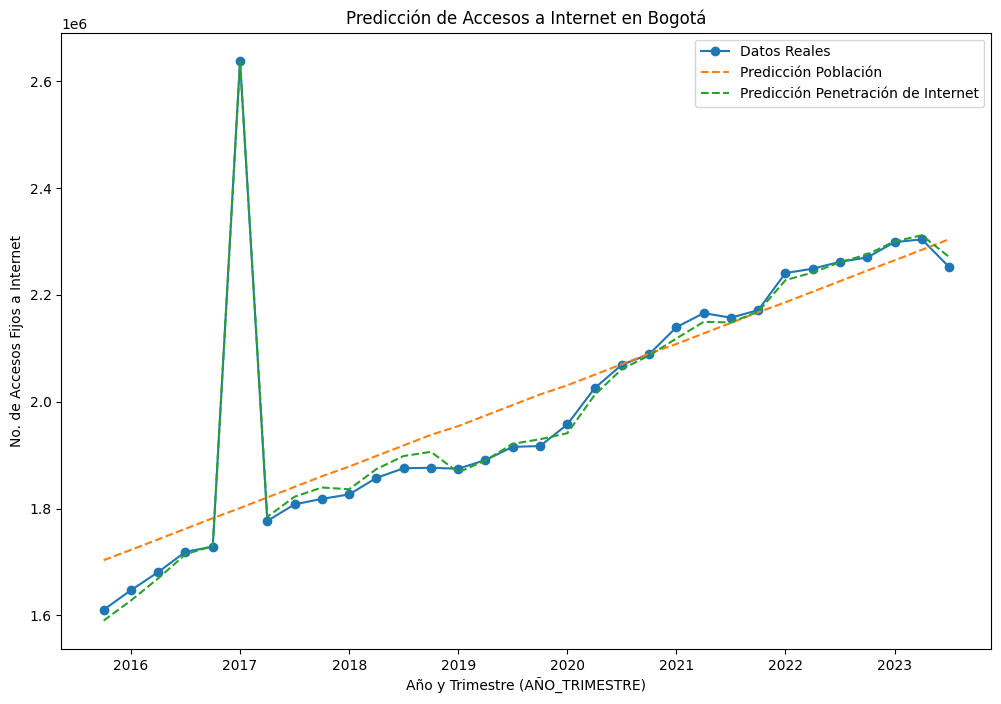

In [44]:
# Crear copias del DataFrame original
bogota_data_copy = bogota_data.copy()

# Crear la columna 'AÑO_TRIMESTRE_num' convirtiendo 'AÑO_TRIMESTRE' en una variable numérica
bogota_data_copy['AÑO_TRIMESTRE_num'] = bogota_data_copy['AÑO_TRIMESTRE'].str[:4].astype(int) + (bogota_data_copy['AÑO_TRIMESTRE'].str[4:].astype(int) - 1) / 4

# Definir las variables X e y para la regresión de población
X_pop = bogota_data_copy[['AÑO_TRIMESTRE_num', 'POBLACIÓN DANE']]
y_pop = bogota_data_copy['No. ACCESOS FIJOS A INTERNET']

# Crear el modelo de regresión lineal para población
model_pop = LinearRegression()
model_pop.fit(X_pop, y_pop)

# Hacer predicciones para población
y_pred_pop = model_pop.predict(X_pop)

# Definir las variables X e y para la regresión de penetración de internet
X_pen = bogota_data_copy[['AÑO_TRIMESTRE_num', 'INDICE(%)']]
y_pen = bogota_data_copy['No. ACCESOS FIJOS A INTERNET']

# Crear el modelo de regresión lineal para penetración de internet
model_pen = LinearRegression()
model_pen.fit(X_pen, y_pen)

# Hacer predicciones para penetración de internet
y_pred_pen = model_pen.predict(X_pen)

# Graficar las predicciones de ambas regresiones
plt.figure(figsize=(12, 8))
plt.plot(bogota_data_copy['AÑO_TRIMESTRE_num'], y_pop, label='Datos Reales', marker='o')
plt.plot(bogota_data_copy['AÑO_TRIMESTRE_num'], y_pred_pop, label='Predicción Población', linestyle='--')
plt.plot(bogota_data_copy['AÑO_TRIMESTRE_num'], y_pred_pen, label='Predicción Penetración de Internet', linestyle='--')
plt.xlabel('Año y Trimestre (AÑO_TRIMESTRE)')
plt.ylabel('No. de Accesos Fijos a Internet')
plt.title('Predicción de Accesos a Internet en Bogotá')
plt.legend()
plt.show()

# Crear DataFrame para la regresión de población
resultados_pop = pd.DataFrame({
    'AÑO_TRIMESTRE': bogota_data_copy['AÑO_TRIMESTRE'],
    'No. ACCESOS FIJOS A INTERNET': y_pop,
    'POBLACIÓN DANE': bogota_data_copy['POBLACIÓN DANE'],
    'ÍNDICE Calculado': y_pred_pop
})

# Crear DataFrame para la regresión de penetración de internet
resultados_pen = pd.DataFrame({
    'AÑO_TRIMESTRE': bogota_data_copy['AÑO_TRIMESTRE'],
    'No. ACCESOS FIJOS A INTERNET': y_pen,
    'INDICE(%)': bogota_data_copy['INDICE(%)'],
    'ÍNDICE Calculado': y_pred_pen
})

In [45]:
bogota_data

,AÑO_TRIMESTRE,DEPARTAMENTO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE(%),AÑO_TRIMESTRE_num
18771,201504,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1610511,7273265,22.14,2016.00
30907,201601,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1647186,7300918,22.56,2016.25
18047,201602,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1681117,7300918,23.03,2016.50
24086,201603,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1719075,7300918,23.55,2016.75
19515,201604,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1728459,7300918,23.67,2017.00
19722,201701,BOGOTÁ D.C.,"BOGOTÁ, D.C.",2638171,7337449,35.95,2017.25
31959,201702,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1776768,7337449,24.22,2017.50
32574,201703,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1807827,7337449,24.64,2017.75
17650,201704,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1818094,7337449,24.78,2018.00
30078,201801,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1826350,7412566,24.64,2018.25
